# **About Dataset**

**Column Details:**

**PassengerId:** Unique identifier for each passenger.

**Survived:** Survival indicator (0 = No, 1 = Yes).

**Pclass:** Passenger class (1 = 1st, 2 = 2nd, 3 = 3rd).

**Name:** Passenger's name.

**Sex:** Passenger's sex.

**Age:** Passenger's age.

**SibSp:** Number of siblings/spouses aboard.

**Parch:** Number of parents/children aboard.

**Ticket:** Ticket number.

**Fare:** Ticket fare.

**Cabin:** Cabin number .

**Embarked:** Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

# **Importing Libraries**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")

# **Reading data file**

In [33]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

# **EDA**

In [34]:
print("The Shape of Dataset: " ,df.shape)
print("Number of Samples: " ,df.shape[0])
print("Number of Features: " ,df.shape[1])

The Shape of Dataset:  (891, 12)
Number of Samples:  891
Number of Features:  12


In [35]:
df.head() #show first 5 columns of df.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.tail() #show last 5 columns of df.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [37]:
df.info() #detailed information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
df.isnull().sum() #sum all null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**This dataset includes a mix of numerical and categorical data, and some columns have missing values that might need to be handled for analysis or modeling process**

**We can't just drop the Null values as the df's size is small and it'll affect the learning process**

In [39]:
df['Age'] = df['Age'].fillna(df['Age'].mean()) #fill null values of Age with mean of column's values.

In [40]:
df['Embarked'].mode() #To get mode.

0    S
Name: Embarked, dtype: object

In [41]:
df['Embarked'].mode()[0]

'S'

In [42]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #fill null values of Embarked with mode of series as it's equals to the 1st value of column [0].

In [43]:
df.describe() #Statistical information about data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
df.drop(columns = ['PassengerId','Name','Ticket','Cabin'],axis = 1,inplace = True) #drop Unnecessary columns.

In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [46]:
Numerical_cols = ['Fare','Age']

for column in Numerical_cols:
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[column], name=column))
    fig.update_layout(title=f"Boxplot for {column}")
    fig.show()

    column_values = df[column] #Identify outliers based on the box plot
    q1 = column_values.quantile(0.25)
    q3 = column_values.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = column_values[(column_values < lower_bound) | (column_values > upper_bound)]

In [47]:
num_repeats = 3 #Define the number of times to repeat each row.
df = pd.concat([df] * num_repeats, ignore_index=True) #Expand the DataFrame by repeating rows.

In [48]:
df['Survived'].value_counts()

Survived
0    1647
1    1026
Name: count, dtype: int64

# **Data Visualization**

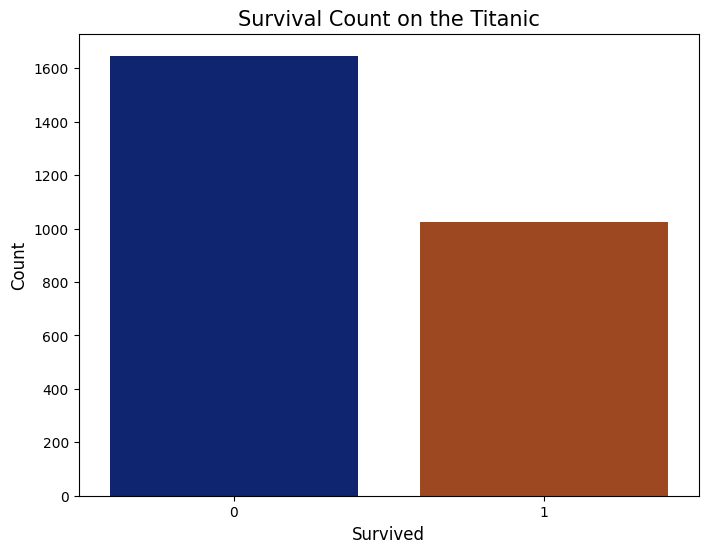

In [49]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Survived', data=df , palette='dark')  #Create a bar plot for the 'Survived' column.

plt.title('Survival Count on the Titanic', fontsize=15) #Add titles and labels.
plt.xlabel('Survived', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(False) #Remove the grid lines.
plt.show()

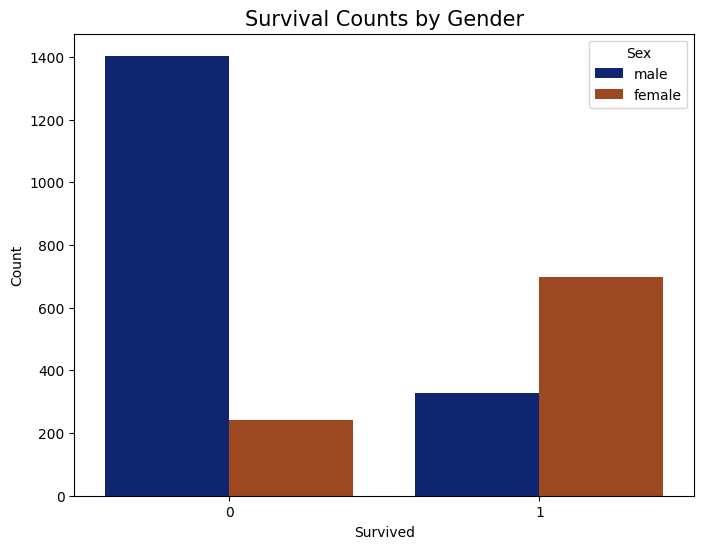

In [50]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Survived', hue='Sex', data=df , palette='dark') #Create a bar plot for the 'Survived' column and 'Sex' column.

plt.title('Survival Counts by Gender', fontsize=15) #Add titles and labels.
plt.xlabel('Survived')
plt.ylabel('Count')

plt.grid(False) #Remove the grid lines.
plt.show()

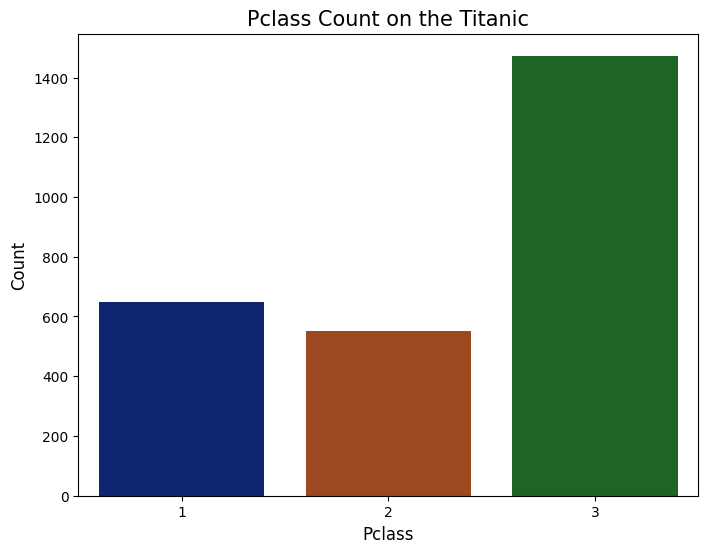

In [51]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Pclass', data=df , palette='dark')  #Create a bar plot for the 'Pclass' column.

plt.title('Pclass Count on the Titanic', fontsize=15) #Add titles and labels.
plt.xlabel('Pclass', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(False) #Remove the grid lines.
plt.show()

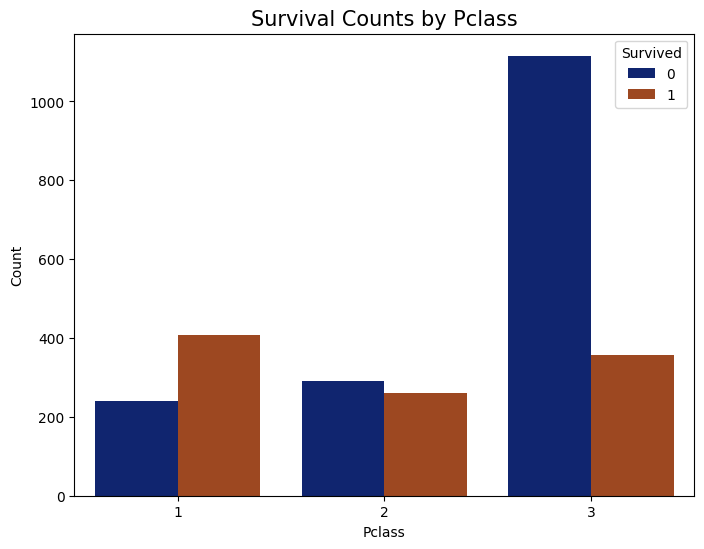

In [52]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Pclass', hue='Survived', data=df , palette='dark') #Create a bar plot for the 'Survived' column and 'Pclass' column.

plt.title('Survival Counts by Pclass', fontsize=15) #Add titles and labels.
plt.xlabel('Pclass')
plt.ylabel('Count')

plt.grid(False) #Remove the grid lines.
plt.show()

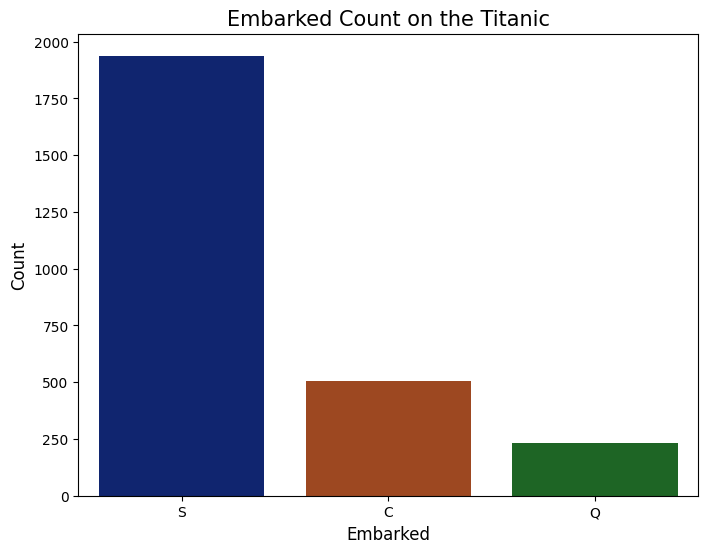

In [53]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Embarked', data=df , palette='dark')  #Create a bar plot for the 'Pclass' column.

plt.title('Embarked Count on the Titanic', fontsize=15) #Add titles and labels.
plt.xlabel('Embarked', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.grid(False) #Remove the grid lines.
plt.show()

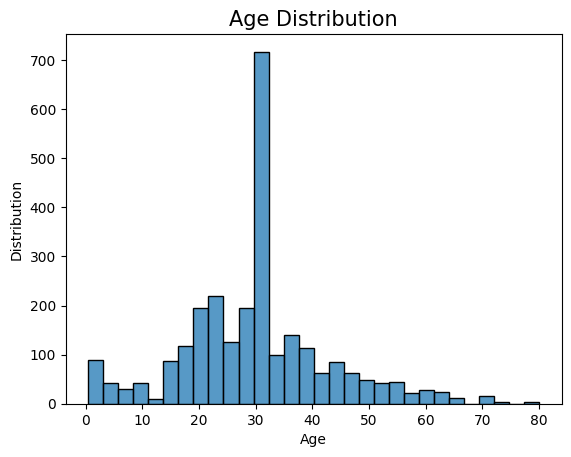

In [54]:
sns.histplot(data = df, x = 'Age', bins=30 , palette='dark')

plt.title('Age Distribution', fontsize=15) #Add titles and labels.
plt.xlabel('Age')
plt.ylabel('Distribution')

plt.grid(False) #Remove the grid lines.
plt.show()

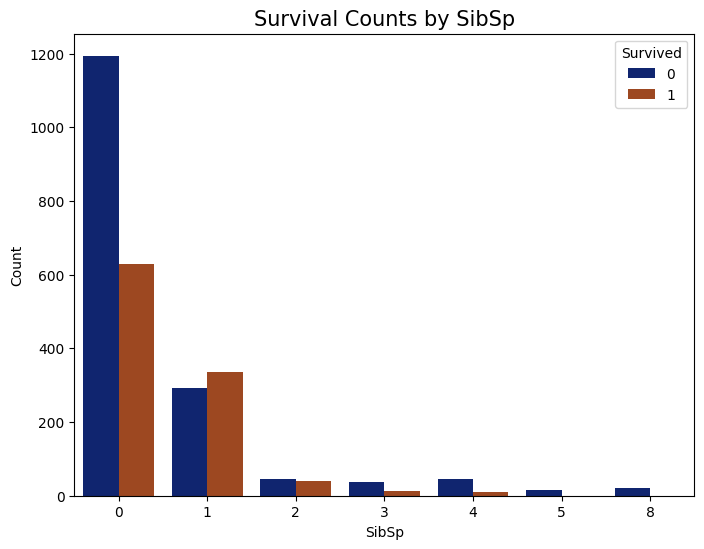

In [55]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='SibSp', hue='Survived', data=df , palette='dark') #Create a bar plot for the 'SibSp' column and 'Pclass' column.

plt.title('Survival Counts by SibSp', fontsize=15) #Add titles and labels.
plt.xlabel('SibSp')
plt.ylabel('Count')

plt.grid(False) #Remove the grid lines.
plt.show()

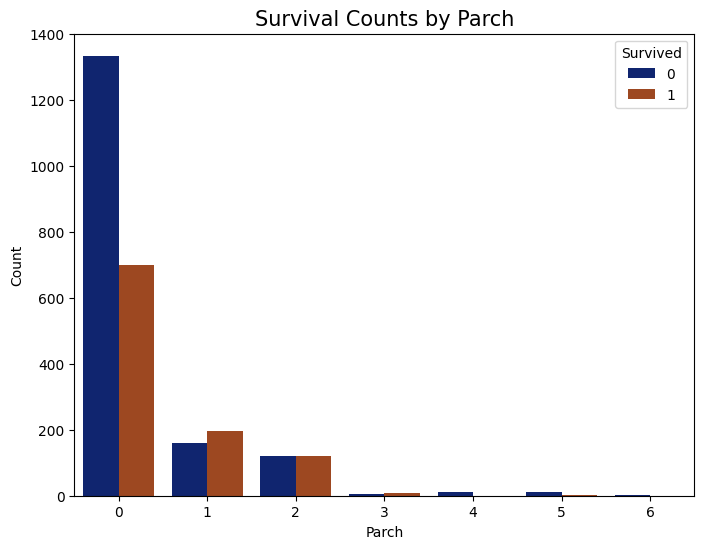

In [56]:
plt.figure(figsize=(8, 6)) #Set the size of graph.
sns.countplot(x='Parch', hue='Survived', data=df , palette='dark') #Create a bar plot for the 'Survived' column and 'Parch' column.

plt.title('Survival Counts by Parch', fontsize=15) #Add titles and labels.
plt.xlabel('Parch')
plt.ylabel('Count')

plt.grid(False) #Remove the grid lines.
plt.show()

In [57]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# **Spliting data into train data & split data**

In [58]:
x = df.drop(columns = 'Survived', axis = 1)
y = df['Survived']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [60]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('--------------------------------------------------------------------------------------------------------------------------------------------------')
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2138, 7)
y_train: (2138,)
--------------------------------------------------------------------------------------------------------------------------------------------------
X_test: (535, 7)
y_test: (535,)


# **Buliding Models**

In [61]:
# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=''):
    model.fit(X_train, y_train)
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
# Calculate metrics
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)
    

# Print metrics
    print(f"{model_name} - Training Metrics: Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}")
    print(f"{model_name} - Test Metrics: Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")
    print("---------------------------------------------------------------------------------------------------------------------------------------")

In [62]:
models = [
    (LogisticRegression(), "Logistic Regression"),
    (MultinomialNB(), "Naive Bayes"),
     (RandomForestClassifier(), "Random Forest"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (LinearSVC(), "SVC")
]
for model, name in models:
    train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name=name)

Logistic Regression - Training Metrics: Accuracy: 0.8050, Precision: 0.7647, Recall: 0.7036
Logistic Regression - Test Metrics: Accuracy: 0.7869, Precision: 0.7513, Recall: 0.6948
---------------------------------------------------------------------------------------------------------------------------------------
Naive Bayes - Training Metrics: Accuracy: 0.6824, Precision: 0.6106, Recall: 0.4551
Naive Bayes - Test Metrics: Accuracy: 0.6991, Precision: 0.6605, Recall: 0.5023
---------------------------------------------------------------------------------------------------------------------------------------
Random Forest - Training Metrics: Accuracy: 0.9841, Precision: 0.9839, Recall: 0.9742
Random Forest - Test Metrics: Accuracy: 0.9626, Precision: 0.9488, Recall: 0.9577
---------------------------------------------------------------------------------------------------------------------------------------
K-Nearest Neighbors - Training Metrics: Accuracy: 0.9130, Precision: 0.8866, Rec

**The Best Model is Random Forest with accuracy train equals 98% and accuracy test equals 96%.**